# This explores using Butterworth filters in Python and compares the results with those produced by MATLAB

MATLAB and Python produce effectively identical results, though you have to be careful that both are doing either causal or forward backward filtering.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.io as sio
import os
import ieeg_funcs as ief
import dgFuncs as dg
import pickle
from scipy import signal
from scipy import stats

In [2]:
# Load RAW data
in_fname='/Users/davidgroppe/ONGOING/TWH_EEG/NA/EEG_MAT/NA_d1_sz2.mat'
#in_fname='/Users/davidgroppe/ONGOING/TWH_EEG/NA/EEG_MAT/NA_d2_sz3_sc.mat'
#NA_d2_sz3_sc_mag_butter_1chan.mat';
matfile=sio.loadmat(in_fname)
print(matfile.keys())

dict_keys(['__version__', 'group_end_index', '__globals__', '__header__', 'Sf', 'matrix_mo', 'matrix_bi'])


In [3]:
# LOAD MATLAB COMPUTED FEATURES
in_fname='/Users/davidgroppe/Desktop/NA_d1_sz2_mag_butter_1chan.mat';
#in_fname='/Users/davidgroppe/Desktop/NA_d2_sz3_sc_mag_butter_1chan.mat';
butter_dict=sio.loadmat(in_fname)
print(butter_dict.keys())
print(butter_dict['chan_id'])
print(butter_dict['se_bands'])
butter_mat=butter_dict['spectral_mag']
bands=butter_dict['se_bands']
butter_mat.shape
bands.shape

dict_keys(['__version__', 'chan_id', 'spectral_mag', 'se_bands', '__globals__', '__header__', 'spectral_mag_labels'])
[[10]]
[[  0   4]
 [  4   8]
 [  8  13]
 [ 13  30]
 [ 30  50]
 [ 70 100]]


(6, 2)

Done


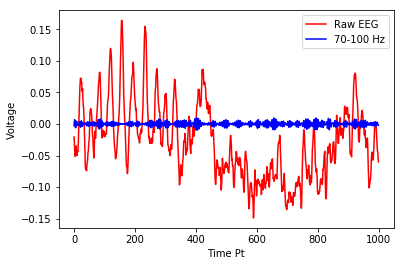

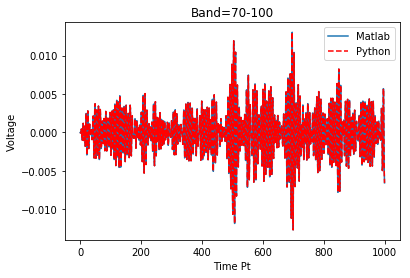

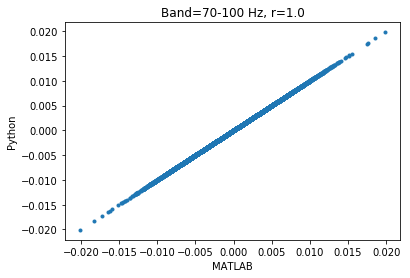

In [5]:
# DO FILTERING IN PYTHON AND COMPARE
filter_order=4
Fs=matfile['Sf']
Nyq=Fs/2
band_id=5
lowpass_cut=bands[band_id,0] # in units of Hz
hipass_cut=bands[band_id,1] # in units of Hz
if lowpass_cut==0:
    b, a = signal.butter(filter_order, hipass_cut/Nyq, 'lowpass', analog=False)
else:
    b, a = signal.butter(filter_order, [lowpass_cut/Nyq, hipass_cut/Nyq], 'bandpass', analog=False)

mat_in=matfile['matrix_bi'][:,9]
mat_in=mat_in-np.mean(mat_in)
mat_out=signal.lfilter(b,a,mat_in)
plt.figure(1)
plt.clf()
plt.plot(mat_in[1000:2000],'r-',label='Raw EEG')
plt.plot(mat_out[1000:2000],'b-',label=str(lowpass_cut)+'-'+str(hipass_cut)+' Hz')
plt.xlabel('Time Pt')
plt.ylabel('Voltage')
plt.legend()

show_tpts=np.arange(0,1000)
plt.figure(2)
plt.clf()
plt.plot(show_tpts,butter_mat[show_tpts,band_id],label='Matlab')
plt.plot(show_tpts,mat_out[show_tpts],'r--',label='Python')
plt.legend()
plt.title('Band='+str(lowpass_cut)+'-'+str(hipass_cut))
plt.xlabel('Time Pt')
plt.ylabel('Voltage')

x=butter_mat[:,band_id]
y=mat_out
r, _=stats.pearsonr(x, y)
plt.figure(3)
plt.clf()
plt.plot(x,y,'.')
plt.xlabel('MATLAB')
plt.ylabel('Python')
plt.title('Band='+str(lowpass_cut)+'-'+str(hipass_cut)+' Hz, r='+str(r))
print('Done')

In [6]:
bro=signal.lfilter(b,a,matfile['matrix_bi'][:,:9])
bro.shape

(93500, 9)

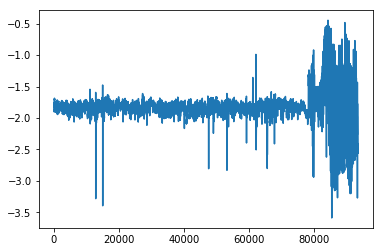

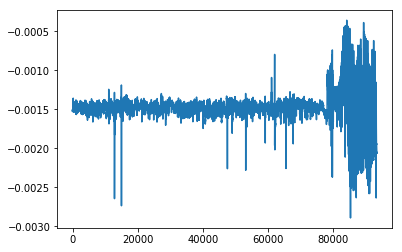

In [9]:
plt.figure()
# plt.plot(bro[:,0])
plt.plot(matfile['matrix_bi'][:,0])

plt.figure()
plt.plot(bro[:,0])